## # Importing necessary Modules

In [22]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Conv2DTranspose
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Reshape
import numpy as np

In [23]:
(x_train, _), (x_test, _) = cifar10.load_data()
print(x_train.shape)
print(x_test.shape)

x_train = x_train.astype('float32') / 255.0
print("The training data is",x_train)
x_test = x_test.astype('float32') / 255.0
print("The testing data is",x_test)

# Split the data into training, validation, and test sets

validation_split = 0.1  
validation_size = int(validation_split * len(x_train))
print ("The Validation data size is",validation_size)
train_data = x_train[:-validation_size]
val_data = x_train[-validation_size:]
test_data = x_test


(50000, 32, 32, 3)
(10000, 32, 32, 3)
The training data is [[[[0.23137255 0.24313726 0.24705882]
   [0.16862746 0.18039216 0.1764706 ]
   [0.19607843 0.1882353  0.16862746]
   ...
   [0.61960787 0.5176471  0.42352942]
   [0.59607846 0.49019608 0.4       ]
   [0.5803922  0.4862745  0.40392157]]

  [[0.0627451  0.07843138 0.07843138]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509805 0.21568628]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117648 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215687 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941177 0.19607843]
   [0.47058824 0.32941177 0.19607843]
   [0.42745098 0.28627452 0.16470589]]

  ...

  [[0.8156863  0.6666667  0.3764706 ]
   [0.7882353  0.6        0.13333334]
   [0.7764706  0.6313726  0.10196079]
   ...
   [0.627451   0.52156866 0.27450982]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333334 

In [24]:
def build_encoder(input_shape):
    input_layer = Input(shape=input_shape)
    x = Conv2D(8, 3, activation='relu')(input_layer)
    print(x)
    y = MaxPool2D(2, 2)(x)
    print(y)    
    z = MaxPool2D(2, 2)(y)
    print(z)
    a = Conv2D(16, 3, activation='relu')(z)
    print(a)
    b = MaxPool2D(2, 2)(a)
    print(b)
    c = Flatten()(b)
    print(c)
    d = Dense(100, activation='relu')(c)
    print(d)
    encoded = Dense(200)(d)
    print(d)
    return Model(inputs=input_layer, outputs=encoded)
input_shape = (32, 32, 3)
encoder = build_encoder(input_shape)

KerasTensor(type_spec=TensorSpec(shape=(None, 30, 30, 8), dtype=tf.float32, name=None), name='conv2d_2/Relu:0', description="created by layer 'conv2d_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 15, 15, 8), dtype=tf.float32, name=None), name='max_pooling2d_3/MaxPool:0', description="created by layer 'max_pooling2d_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 8), dtype=tf.float32, name=None), name='max_pooling2d_4/MaxPool:0', description="created by layer 'max_pooling2d_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5, 5, 16), dtype=tf.float32, name=None), name='conv2d_3/Relu:0', description="created by layer 'conv2d_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2, 2, 16), dtype=tf.float32, name=None), name='max_pooling2d_5/MaxPool:0', description="created by layer 'max_pooling2d_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name=None), name='flatten_1/Reshape:0', description="created by layer 'flatten_1'")
KerasTensor(type_spec=Ten

In [25]:
def build_decoder(encoded_shape):
    input_layer = Input(shape=encoded_shape)
    print (input_layer)
    x = Dense(6 * 6 * 16, activation='relu')(input_layer)
    print(x)
    y = Reshape(target_shape=(6, 6, 16))(x)
    print(y)
    z = Conv2DTranspose(8, 4, strides=2, activation='relu', output_padding=1)(y)
    print(z)
    a = BatchNormalization()(z)
    print(a)
    decoded = Conv2DTranspose(3, 4, strides=2, activation='relu')(a)
    print (decoded)
    return Model(inputs=input_layer, outputs=decoded)
encoded_shape = (200,)
decoder = build_decoder(encoded_shape)

KerasTensor(type_spec=TensorSpec(shape=(None, 200), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 576), dtype=tf.float32, name=None), name='dense_5/Relu:0', description="created by layer 'dense_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 6, 6, 16), dtype=tf.float32, name=None), name='reshape_1/Reshape:0', description="created by layer 'reshape_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 15, 15, 8), dtype=tf.float32, name=None), name='conv2d_transpose_2/Relu:0', description="created by layer 'conv2d_transpose_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 15, 15, 8), dtype=tf.float32, name=None), name='batch_normalization_1/FusedBatchNormV3:0', description="created by layer 'batch_normalization_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), name='conv2d_transpose_3/Relu:0', description="created by layer 'conv2d_transpose_3'")


## Connect the encoder and decoder to create the autoencoder


In [26]:
input_layer = Input(shape=input_shape)
encoded = encoder(input_layer)
decoded = decoder(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)

autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 model_3 (Functional)        (None, 200)               28092     
                                                                 
 model_4 (Functional)        (None, 32, 32, 3)         118251    
                                                                 
Total params: 146343 (571.65 KB)
Trainable params: 146327 (571.59 KB)
Non-trainable params: 16 (64.00 Byte)
_________________________________________________________________


## Training

In [27]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
history=autoencoder.fit(x_train, x_train, epochs=3, batch_size=10, validation_split=0.2, 
                validation_data=(val_data, val_data))


Epoch 1/3
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0370 - val_loss: 0.0293
Epoch 2/3
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0309 - val_loss: 0.0297
Epoch 3/3
5000/5000 [==============================] - 13s 3ms/step - loss: 0.0301 - val_loss: 0.0282


In [28]:
test_loss = autoencoder.evaluate(test_data, test_data)
print("Test Loss is:", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0287
Test Loss is: 0.028674405068159103


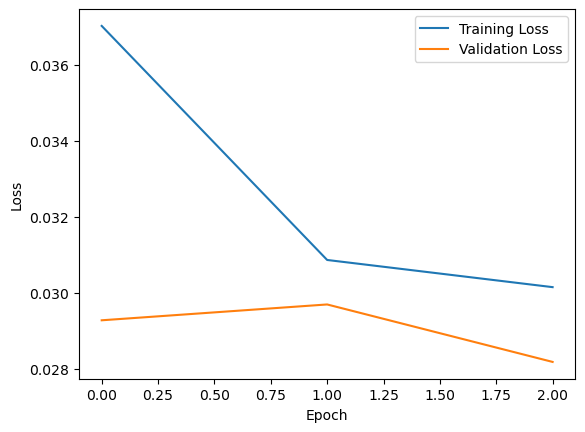

In [29]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Plot the loss curves
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 6ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


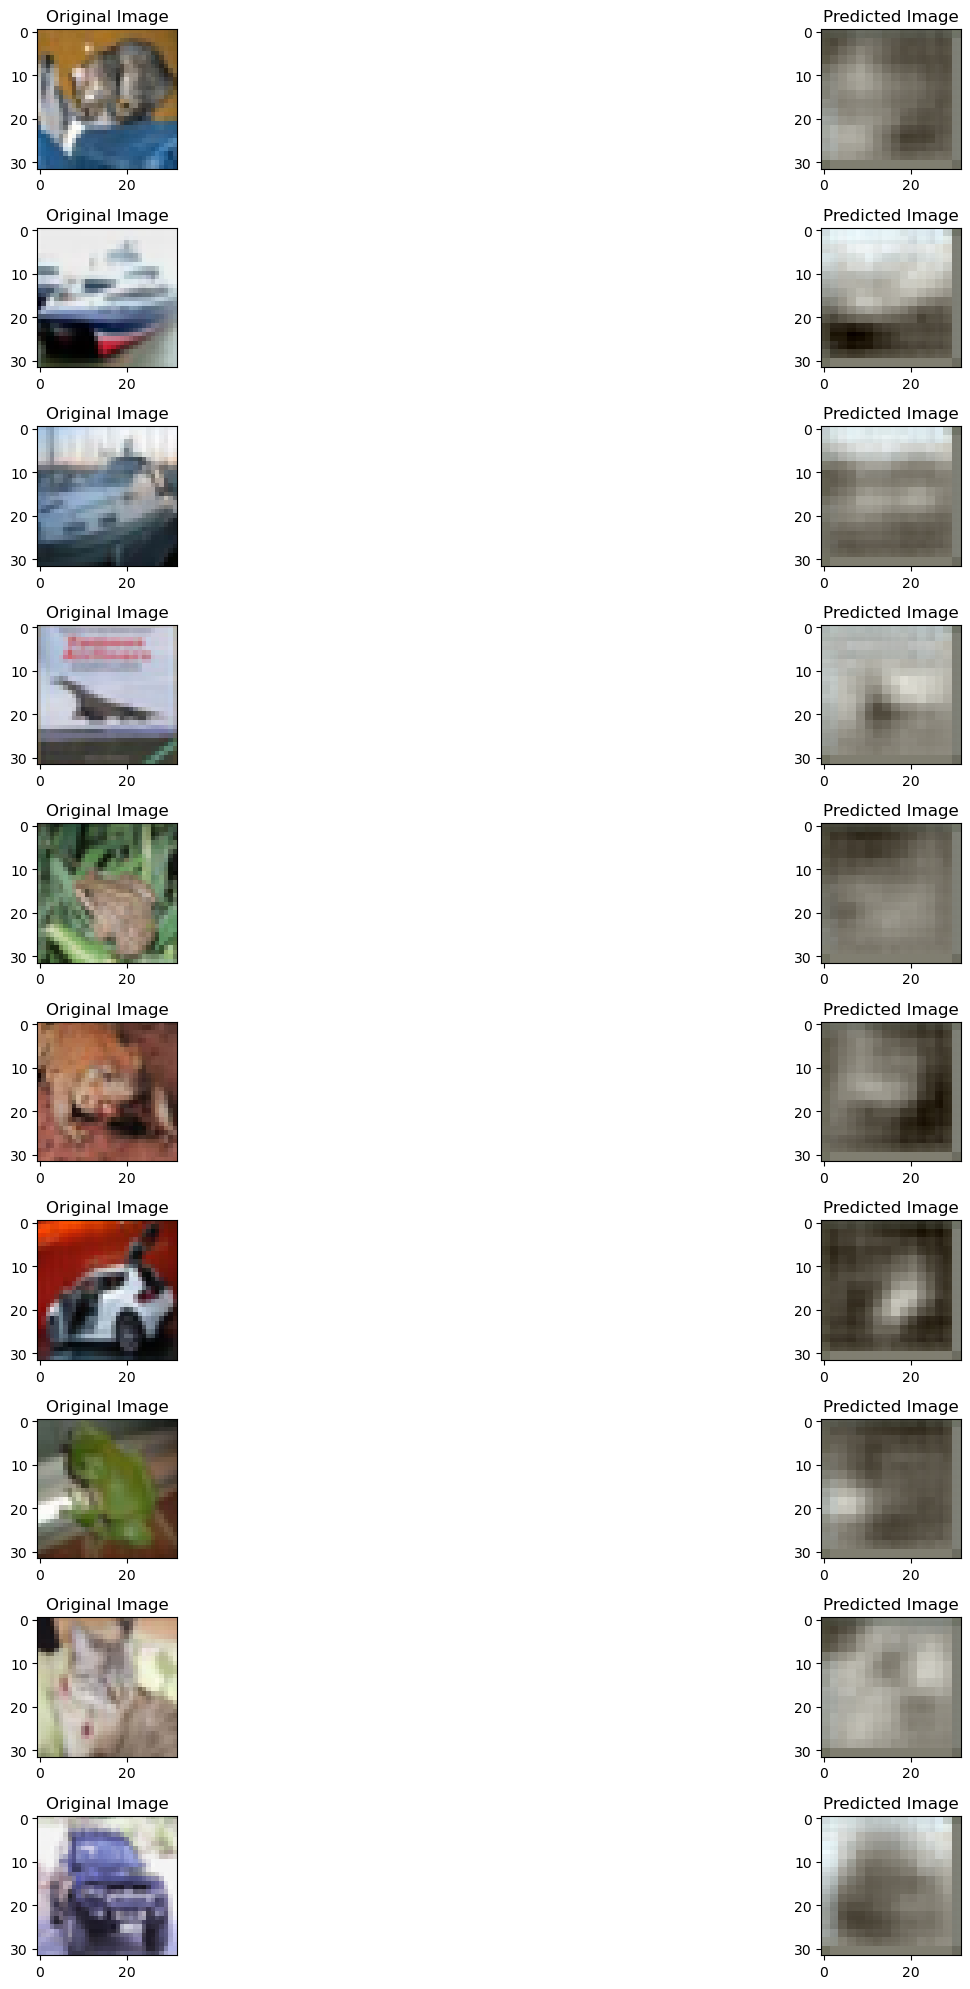

In [30]:
import matplotlib.pyplot as plt

x_test = x_test  

plt.figure(figsize=(22, 20))

for i in range(10):
    original_image = x_test[i]

    predicted_image = autoencoder.predict(tf.expand_dims(original_image, 0))[0]

    plt.subplot(10, 2, 2 * i + 1)
    plt.title('Original Image')
    plt.axis('on')
    plt.imshow(original_image)

    plt.subplot(10, 2, 2 * i + 2)
    plt.title('Predicted Image')
    plt.axis('on')
    plt.imshow(predicted_image)

plt.tight_layout()
plt.show()


## Autoencoder

### Encoder: 

Encoder is a deep learning approach where it compress the input file into a latent space representation.
It takes the input image and covert it into lower dimension image of the orginal image.  This compressed image is then fed as an input to the decoder.

## Decoder

Decoder is a machanism which converts lower dimension as an input and generates an output, often of the 
same type as the input data.

## Autoencoder

These neural networks consist of an encoder and decoder. They are used for tasks like data compression, feature learning, and anomaly detection. Here we take samples from Cifar10, where we train, test and validate the incoming data. Our Autoencoder has the property of encoding and decoding the images.

## Testing:

We will train the autoencoder with the images from Cifar10. These imagaes are used to train our model and make
model to predict and enlarge to original image

## Loss Function

Choose an appropriate loss function for your task. For image prediction and enlargement, mean squared error (MSE) loss or similar reconstruction loss functions are often used.
The loss measures the difference between the input image and the output image generated by the autoencoder.